In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import tqdm
import matplotlib.pyplot as plt

In [1]:
def get_classifier_score(file_path = "../deeppavlov_ner_3.6/data/ner_overlap_result.csv",
                         model = lambda: KNeighborsClassifier(3),
                         x_columns = ["distance", "ner_overlap"],
                         y_column = "score"):
    result_data =  pd.read_csv(file_path)
    result_x_columns = []
    result_scores = []

    for i in tqdm.tqdm(range(len(x_columns))):
        for j in range(i+1, len(x_columns)+1):

            if i == j:
                current_x_columns = [x_columns[i]]
            else:
                current_x_columns = x_columns[i:j]

            x = np.asarray(result_data[current_x_columns]).reshape(-1, len(current_x_columns))
            y = np.asarray(result_data[y_column]).reshape(-1, 1)

            X_train, X_test, y_train, y_test = \
                    train_test_split(x, y, test_size=.7, random_state=42)

            classifier = model()
            classifier.fit(X_train, y_train)

            result_scores.append(classifier.score(X_test, y_test))
            result_x_columns.append(current_x_columns)

    return result_x_columns, result_scores

def train(file_path="./data/result.csv", classifier = KNeighborsClassifier(3)):
    result_data =  pd.read_csv(file_path)

    x = np.asarray(result_data["distance"].tolist()).reshape(-1, 1)
    y = np.asarray(result_data["score"].tolist()).reshape(-1, 1)

    classifier.fit(x, y)
    return classifier

def print_scores(scores_structure):
    # features = ['\n'.join(x) for x in scores_structure[0]]
    features = list(range(len(scores_structure[0])))
    # plt.figure(figsize=(20,20))
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'font.size': 30})
    plt.bar(features, scores_structure[1], align='edge', width=0.3)
    plt.ylabel('score', fontsize=44)
    plt.xlabel('features', fontsize=44)
    plt.savefig('././data/bar_char.png')
    plt.show()

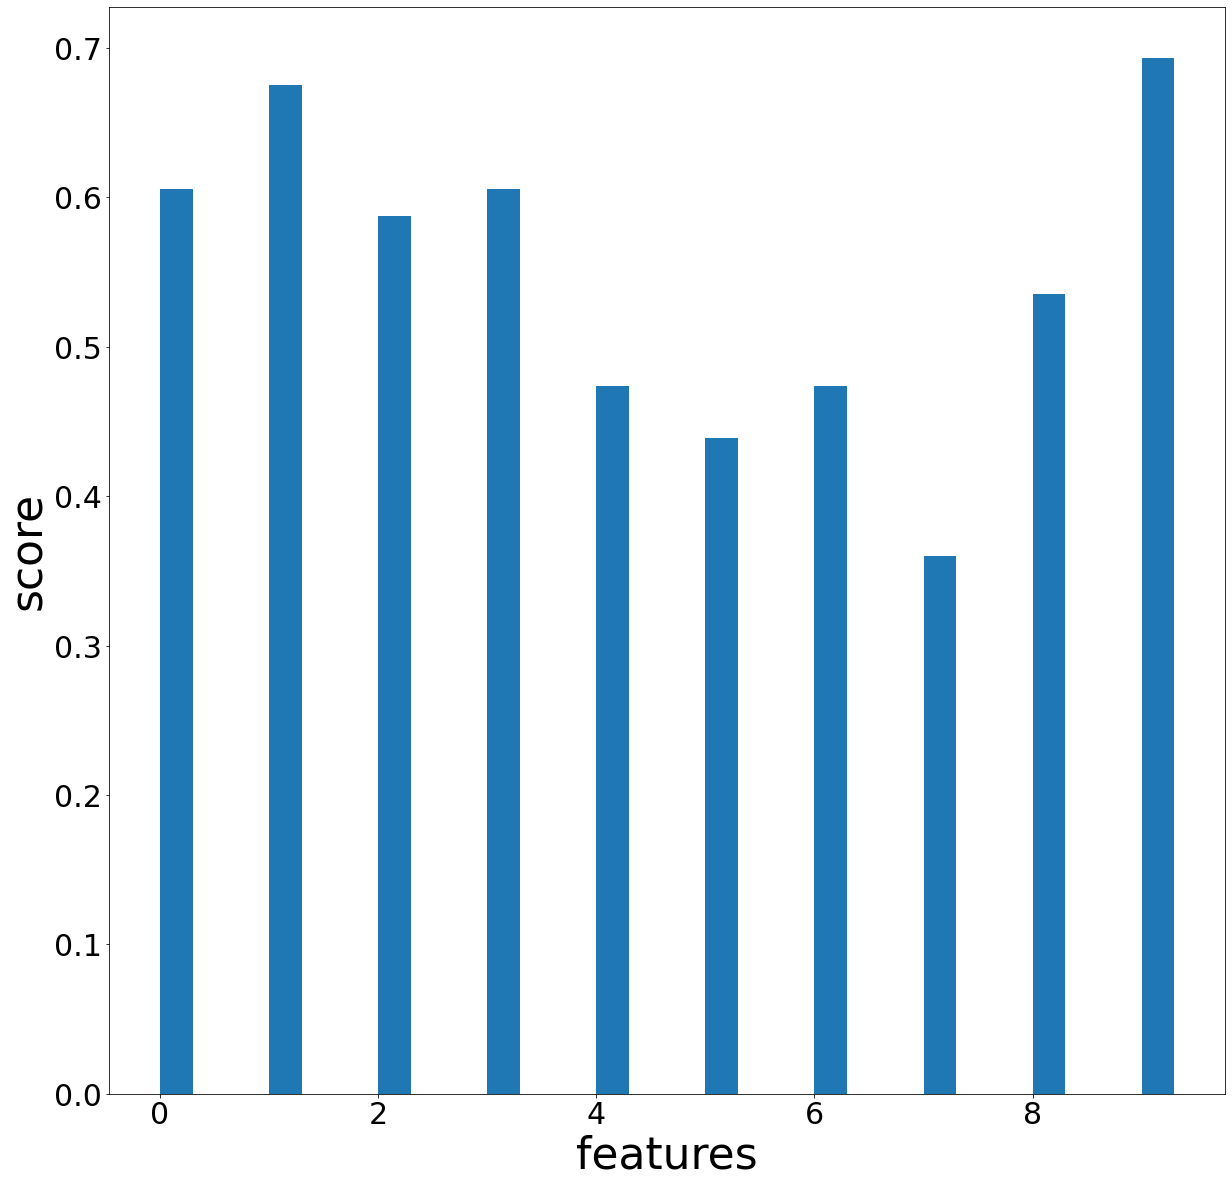

In [99]:
scores_structure = get_classifier_score(file_path="./data/concat_result.csv",
                                        x_columns=["distance", "ner_overlap", "use_distance", "fasttext_distance"])

print_scores(scores_structure)

In [100]:
for i in range(len(scores_structure[0])):
    print(i,": ",scores_structure[0][i])

0 :  ['distance']
1 :  ['distance', 'ner_overlap']
2 :  ['distance', 'ner_overlap', 'use_distance']
3 :  ['distance', 'ner_overlap', 'use_distance', 'fasttext_distance']
4 :  ['ner_overlap']
5 :  ['ner_overlap', 'use_distance']
6 :  ['ner_overlap', 'use_distance', 'fasttext_distance']
7 :  ['use_distance']
8 :  ['use_distance', 'fasttext_distance']
9 :  ['fasttext_distance']
